# **CANCER PREDICTION MODEL**


<img src="https://max-website20-images.s3.ap-south-1.amazonaws.com/MHC_Digital_Treatments_Available_For_Blood_Cancer_Part_13_925x389pix_150322n_01_dc4d07f20e.jpg" width="100%" height="100%" class="center" display = block; margin-left = auto; margin-right = auto />

### **Problem Statement** 

Cancer has become one of the major factors responsible for global deaths, due to late diagnoses and lack of proper treatment. It involves the abnormal and uncontrolled growth of cells inside the body, which might spread from one place to different parts. Ribonucleic acid (RNA) sequencing can detect the changes occurring inside cells and helps to analyze the transcriptome of gene expression patterns inside RNA. Machine learning techniques can assist in the prediction of cancer at an early stage, if data is available. 

#### **Objectives**
The objective for this project is to build models and classify the different cancer types using RNA-seq gene expression data.

For this purpose we implemented supervised models to classify the samples collected using the labels and compare the performance of the respective models.

#### **Data Description**
The dataset was collected from UCI Machine Learning Repository. The rows represent the observations gene expressions of patients having different types of tumors (cancer types). The last column contains the cancer types as listed below:
- BRCA for Breast Cancer
- KIRC for Renal Cancer (Kidney Renal Clear Cell Carcinoma)
- LUAD for Lung Cancer (Lung adenocarcinoma)
- PRAD for Prostate Cancer (Prostate adenocarcinoma)
- COAD fro Colon adenocarcinoma



## **Machine Learning Workflow**
[1. Importing Python Libraries](#Importing-Python-libraries)

[2. Importing data](#Importing-data)

[3. Data Exploration & Cleaning](#Data-Exploration-&-Cleaning)

[4. Data Preprocesing](#Data-preprocesing)

[5. Building & Evaluation of Model](#Building-the-model)

   * [-KNeighbours Classifier](#KNeighborsClassifier)
   
   * [-Logistic Regression](#Logistic-Regression)
   
   * [-SGDClassifier](#SGDClassifier)
   * [-RandomForest Classifier](#RandomForestClassifier)
   * [-Decision Tree Classifier](#Decision-Tree-Classifier)
   * [-Voting Classifier](#VotingClassifier)  
   * [-XGBoost](#XGBoost)
   * [-BaggingClassifier](#BaggingClassifier)
   * [-AdaBoostClassifier](#AdaBoostClassifier)
    
[6. Result](#RESULT)   

### **Importing  Python libraries**

In [ ]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC


# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#ensemble libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier


#pipipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### **Importing data**

In [ ]:

#Importing data 

cancer_data = pd.read_csv('cancer_gene_expression.csv')
cancer_data.head(3)


,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA


### **Data Exploration & Cleaning**




In [ ]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

cancer_data.shape

(801, 8001)

In [ ]:
#check for missing values
datanul=cancer_data.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
#checking for duplicates
cancer_data[cancer_data.duplicated()]

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type


In [ ]:
cancer_data.duplicated().sum()
print("The dataset contains {} duplicates, and it's cleaned ".format(cancer_data.duplicated().sum()))

The dataset contains 0 duplicates, and it's cleaned 


#### **Exploratory Data Analysis**

Text(0.5, 0, 'Standard Deviation')

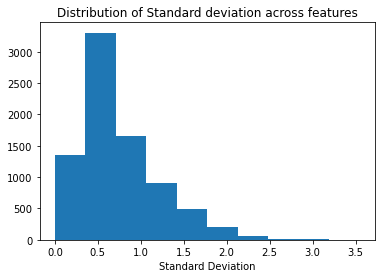

In [ ]:
plt.hist(cancer_data.iloc[:,:-1].std())
plt.title('Distribution of Standard deviation across features')
plt.xlabel('Standard Deviation')

Text(0.5, 0, 'Mean')

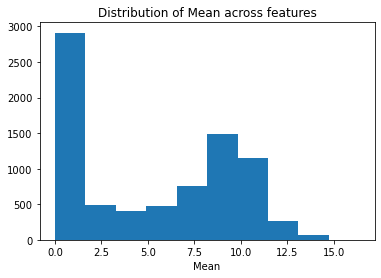

In [ ]:
plt.hist(cancer_data.iloc[:,:-1].mean())
plt.title('Distribution of Mean across features')
plt.xlabel('Mean')

 Based on the graphs above it is noted that although most of the columns have their mean around 0, the standard deviation of the various columns are around 0.5.
 SInce it is required the standard deviation be 1 for normally distributed data, it is concluded that the data needs to be preprocessed with a scaler before building of models. This will normalize the data and improve effectiveness of the models

In [ ]:
#lets check the name of the last column of this dataframe
cancer_data.columns[-1]

'Cancer_Type'

In [ ]:
#checking the counts of the different cancer types that are in the data

print(cancer_data['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


 It is noted that there are 5 classes/cancer types. Although the count of BRCA is quite high, it doesn't indicate imbalance that will throw of the effectiveness of the machine learning models

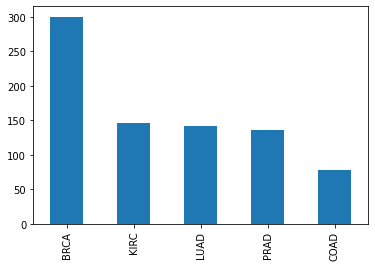

In [ ]:
#plot a bar chat to display the class distribution

cancer_data['Cancer_Type'].value_counts().plot.bar()

 
### **Data preprocesing** 
The data is first separated into features and a target variable after which the classes are encoded as numeric type


In [ ]:
# 1. Separating data into features (X) and the target (y)
X = cancer_data.drop(['Cancer_Type'], axis =1)
y = cancer_data['Cancer_Type']

print('X')
print(X.head(1))
print()
print('y')
print(y.head())

X
   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   

   gene_10  ...  gene_7991  gene_7992  gene_7993  gene_7994  gene_7995  \
0  2.81576  ...   6.883022  11.558803   8.881802    6.01484   6.643534   

   gene_7996  gene_7997  gene_7998  gene_7999  gene_8000  
0  11.740624   7.065012   9.932659   6.928584   2.088413  

[1 rows x 8000 columns]

y
0    KIRC
1    KIRC
2    BRCA
3    KIRC
4    COAD
Name: Cancer_Type, dtype: object


\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [ ]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [ ]:
classes

array([0, 1, 2, 3, 4])

### **Feature Engineering to Reduce Dimensionality**

#### **Principal Component Analysis VRS Linear Discriminant Analysis**

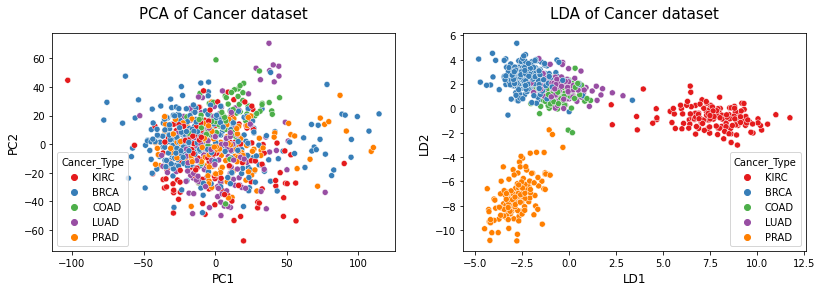

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=250)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components= 4, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of Cancer dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of Cancer dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

- LDA is typically used for multi-class classification. It is a dimensionality reduction technique that best separates or discriminates (hence the name LDA) training instances by their classes. 

- From the graph it can been see that it perfectly separates the class labels whiles reducing the columns.


- The major difference between LDA and PCA is that LDA finds a linear combination of input features that optimizes class separability while PCA attempts to find a set of uncorrelated components of maximum variance in a dataset. 

- Another key difference between the two is that PCA is an unsupervised algorithm whereas LDA is a supervised algorithm where it takes class labels into account.

**In this project we will use LDA for our analysis.**

\
**Data Splitting**\
The data will now split into training and test subsets.
The training data is initially passed to the machine learning model during fitting. This is to enable the model to identify patterns which can be used to make future predictions.
The testing data is used to evaluate the model after the training phase.

In [ ]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X_lda,y_encoded,test_size=0.2,random_state = 42)

### **Building the models**

#### **KNeighbors Classifier Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [ ]:
#checking for the test and train accuracies
print("Train score:{:.2f}".format(knn.score(X_train,y_train)))
print("Test score:{:.2f}\n".format(knn.score(X_test,y_test)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, knn_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=knn_y_pred))

Train score:0.99
Test score:0.99

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        16
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        33

    accuracy                           0.99       161
   macro avg       0.98      0.99      0.98       161
weighted avg       0.99      0.99      0.99       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 33]]


#### **Logistic Regression Model** 

In [ ]:
#Instantiating and fitting the model
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_y_pred = logit.predict(X_test)

#checking for the test and train accuracies
print("Train score:{:.2f}".format(logit.score(X_train,y_train)))
print("Test score:{:.2f}\n".format(logit.score(X_test,y_test)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, logit_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=logit_y_pred))

Train score:1.00
Test score:0.98

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        16
           2       0.96      0.96      0.96        28
           3       0.96      0.96      0.96        24
           4       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.97      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 27  1  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 33]]


#### **SVC Classifier Model**

In [ ]:
#Instantiating and fitting the model
svc = SVC(kernel = 'poly',C = 1,degree = 2)
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(svc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(svc.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, svc_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=svc_y_pred))

Test score:0.97
Train score:0.98

Classifcation report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.94      0.94      0.94        16
           2       1.00      0.96      0.98        28
           3       1.00      0.92      0.96        24
           4       1.00      0.97      0.98        33

    accuracy                           0.97       161
   macro avg       0.97      0.96      0.97       161
weighted avg       0.97      0.97      0.97       161

Confusion matrix:
 [[60  0  0  0  0]
 [ 1 15  0  0  0]
 [ 1  0 27  0  0]
 [ 1  1  0 22  0]
 [ 1  0  0  0 32]]


#### **RandomForest Classifier Model**

In [ ]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.4,random_state=20,n_jobs=-1,criterion='gini',max_depth=6))
RF.fit(X_train,y_train)
RF_y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

#checking for the test and train accuracies
print("Train score:{:.2f}".format(RF.score(X_train,y_train)))
print("Test score:{:.2f}\n".format(RF.score(X_test,y_test)))


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, RF_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred= RF_y_pred))

Train score:1.00
Test score:0.98

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.94      0.94      0.94        16
           2       0.97      1.00      0.98        28
           3       0.92      0.96      0.94        24
           4       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.96      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161

Confusion matrix:
 [[58  0  1  1  0]
 [ 0 15  0  1  0]
 [ 0  0 28  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 33]]


#### **Decision Tree Classifier Model**

In [ ]:
#Instantiating and fitting the model
dtr= DecisionTreeClassifier(criterion = 'gini',max_depth = 6, random_state = 100)
dtr.fit(X_train,y_train)
tree_y_pred = dtr.predict(X_test)

#checking for the test and train accuracies
print("Train score:{:.2f}".format(dtr.score(X_train,y_train)))
print("Test score:{:.2f}\n".format(dtr.score(X_test,y_test)))


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, tree_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred= tree_y_pred))

Train score:1.00
Test score:0.97

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.94      1.00      0.97        16
           2       0.96      0.96      0.96        28
           3       0.92      0.96      0.94        24
           4       1.00      0.97      0.98        33

    accuracy                           0.97       161
   macro avg       0.96      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161

Confusion matrix:
 [[58  0  1  1  0]
 [ 0 16  0  0  0]
 [ 1  0 27  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  1 32]]


#### **Voting Classifier Model**

In [ ]:
# Instantiate individual classifiers
lr = LogisticRegression(C=0.1, class_weight=None, random_state=42)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
dtr = DecisionTreeClassifier()
svc = SVC(kernel= 'poly', C= 1,degree = 2)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbors', knn),
('Random Forest', rfc),
('Decision Tree', dtr), ('SVC', svc)]

In [ ]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set (ROS)
        model.fit(X_train,y_train)
        # Predict the labels of the test set
        model_y_pred = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, balanced_accuracy_score(y_test, model_y_pred)))

Logistic Regression : 0.99
K Nearest Neighbors : 0.98
Random Forest : 0.99
Decision Tree : 0.97
SVC : 0.96


In [ ]:
#Instantiating  votting classifier model 
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels (ROS)
vc.fit(X_train, y_train)
vc_y_pred = vc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vc.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, vc_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=vc_y_pred))

# print("\n")
# # Obtain metrics
# print('Accuracy :{0:0.2f}'.format(accuracy_score(vc_y_pred , y_test))) 
# print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , vc_y_pred)))
# print('Precision : {0:0.2f}'.format(precision_score(y_test , vc_y_pred)))
# print('Recall : {0:0.2f}'.format(recall_score(y_test , vc_y_pred)))
# print('F1 : {0:0.2f}'.format(f1_score(y_test , vc_y_pred)))
# print("\n")

Test score:0.99
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        16
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        33

    accuracy                           0.99       161
   macro avg       0.98      0.99      0.98       161
weighted avg       0.99      0.99      0.99       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 33]]


#### **Gradient Boost Model**

In [ ]:
#Instantiating the model with best parameters
gbc = GradientBoostingClassifier()

#Fitting the model with X_train_ros, y_train_ros
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(gbc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(gbc.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, gbc_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=gbc_y_pred))

Test score:0.98
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.94      1.00      0.97        16
           2       0.97      1.00      0.98        28
           3       1.00      0.92      0.96        24
           4       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 28  0  0]
 [ 1  1  0 22  0]
 [ 0  0  0  0 33]]


#### **Bagging Model**

In [ ]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt)
# fit model on training data
bc.fit(X_train,y_train)

# predict model and calculate accuracy
bc_y_pred = bc.predict(X_test)


#checking for the test and train accuracies
print("Test score:{:.2f}".format(bc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(bc.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, bc_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=bc_y_pred))


Test score:0.98
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        16
           2       0.97      1.00      0.98        28
           3       0.96      0.96      0.96        24
           4       1.00      0.97      0.98        33

    accuracy                           0.98       161
   macro avg       0.97      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  1 32]]


#### **AdaBoost Model**

In [ ]:
# Instantiate a decition tree classifier as the weaker model
dtc= DecisionTreeClassifier()

#Instantiating and fitting the model
adb = AdaBoostClassifier(base_estimator = dtc)
adb.fit(X_train,y_train)
adb_y_pred = adb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(adb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(adb.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, adb_y_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=adb_y_pred))


Test score:0.96
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.94      1.00      0.97        16
           2       0.90      0.96      0.93        28
           3       0.92      0.96      0.94        24
           4       0.97      0.91      0.94        33

    accuracy                           0.96       161
   macro avg       0.95      0.96      0.95       161
weighted avg       0.96      0.96      0.96       161

Confusion matrix:
 [[58  0  1  0  1]
 [ 0 16  0  0  0]
 [ 0  0 27  1  0]
 [ 0  1  0 23  0]
 [ 0  0  2  1 30]]


#### **XGBoost Model**

In [ ]:
#instantiating and fitting the model
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(xgboost.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(xgboost.score(X_train,y_train)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, xgb_pred))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=xgb_pred))

Test score:0.99
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      1.00      0.97        16
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        33

    accuracy                           0.99       161
   macro avg       0.98      0.99      0.98       161
weighted avg       0.99      0.99      0.99       161

Confusion matrix:
 [[59  0  1  0  0]
 [ 0 16  0  0  0]
 [ 0  0 28  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 33]]


### **Selection of Best Model**
Average F1 score will be used to select our model. Because F1 Score is the weighted average of Precision and Recall. Therefore, it score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

In [ ]:
knn_f1 = f1_score(y_test, knn_y_pred, average = 'weighted')
logit_f1 = f1_score(y_test, logit_y_pred, average = 'weighted')
svc_f1 = f1_score(y_test, svc_y_pred, average = 'weighted')
tree_f1 = f1_score(y_test, tree_y_pred, average = 'weighted')
rfc_f1 = f1_score(y_test, RF_y_pred, average = 'weighted')
bc_f1 = f1_score(y_test, bc_y_pred, average = 'weighted')
adb_f1 = f1_score(y_test, adb_y_pred, average = 'weighted')
gbc_f1 = f1_score(y_test, gbc_y_pred, average = 'weighted')
vc_f1 = f1_score(y_test, vc_y_pred, average = 'weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average = 'weighted')


In [ ]:
#creating the list for models
Model = ['KNN', 'Logit', 'SVC', 'Decision Tree','Random Forest', 'Bagging', 
         'AdaBoost','Gradient Boost','Voting', 'XGBOOST']

F1_Score = [knn_f1, logit_f1, svc_f1, tree_f1, rfc_f1, bc_f1, adb_f1, gbc_f1,vc_f1, xgb_f1] 

In [ ]:
#Creating the DataFrame

performance = pd.DataFrame({'Model':Model, 'F1_Score':F1_Score})
performance.set_index('Model')

,F1_Score
Model,
KNN,0.987634
Logit,0.981434
SVC,0.968971
Decision Tree,0.969102
Random Forest,0.975295
Bagging,0.981441
AdaBoost,0.956741
Gradient Boost,0.981245
Voting,0.987634


In [ ]:
performance = performance.sort_values(['F1_Score'],ascending=False)
performance = performance.reset_index(drop=True)
performance

,Model,F1_Score
0,KNN,0.987634
1,Voting,0.987634
2,XGBOOST,0.987634
3,Bagging,0.981441
4,Logit,0.981434
5,Gradient Boost,0.981245
6,Random Forest,0.975295
7,Decision Tree,0.969102
8,SVC,0.968971
9,AdaBoost,0.956741


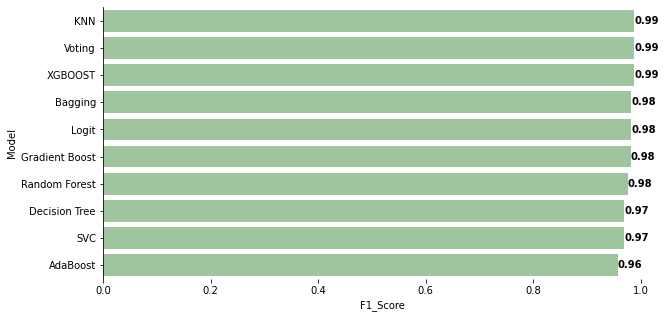

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y="Model", x="F1_Score", data = performance, color = "green", alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold',ha = 'left', va = 'center')
plt.show()

### **ROC Curve**

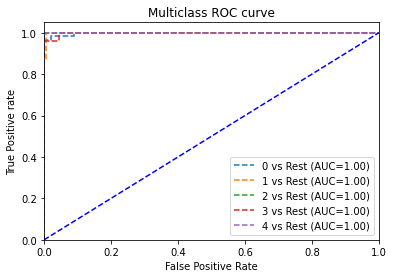

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

### **Best Model**

After training each of the models, these are the final results. The scores for KNN, Voting Classifier and XGBOOST models are very promising for our dataset! Each model has a 0.99% recall scorce and high F1 score, which is exactly what we’re looking for. This means wthe models capture more cancer disease, but also flag some normal situations as cancer. An experimental test can then been used to confirm this claim.
 
**XGBoost is our final model, as this give highest F1 score of 99.9% on test datasets.**